# Worksheet 3: 
# Answers

### Rough plan

#### SST trends

1. Load in SST timeline. 



In [84]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset,num2date
from datetime import date, timedelta
from scipy.stats import linregress
from scipy.stats import ks_2samp
from scipy.io import loadmat
import matplotlib as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
sns.set_style('white')
mpl.rcParams['figure.dpi'] = 300

In [35]:
# 1. SST fitting more lines

def plot_poly(x,y,degree):
    """ This function takes the x and y as data input and fits a polynomial line """
    # np.polyfit returns an array that contains the polynomial coefficients
    # in ascending order, i.e. x^0, x^1, x^2
    coefs = np.polyfit(x, y, degree)
    # poly1d puts the coefficients in the right format
    poly = np.poly1d(coefs)
    print(poly)
    new_y = poly(x)
    plt.plot(x,new_y,label = '%sD polynomial regression' % degree)

In [43]:
def moving_average(a, n=3) :
    ret = np.cumsum(np.array(a), dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

           3             2
4.325e-08 x - 0.0001909 x + 0.2576 x - 97.42
            6             5             4          3       2
-4.187e-12 x + 4.878e-08 x - 0.0002368 x + 0.6128 x - 892 x + 6.923e+05 x - 2.238e+08


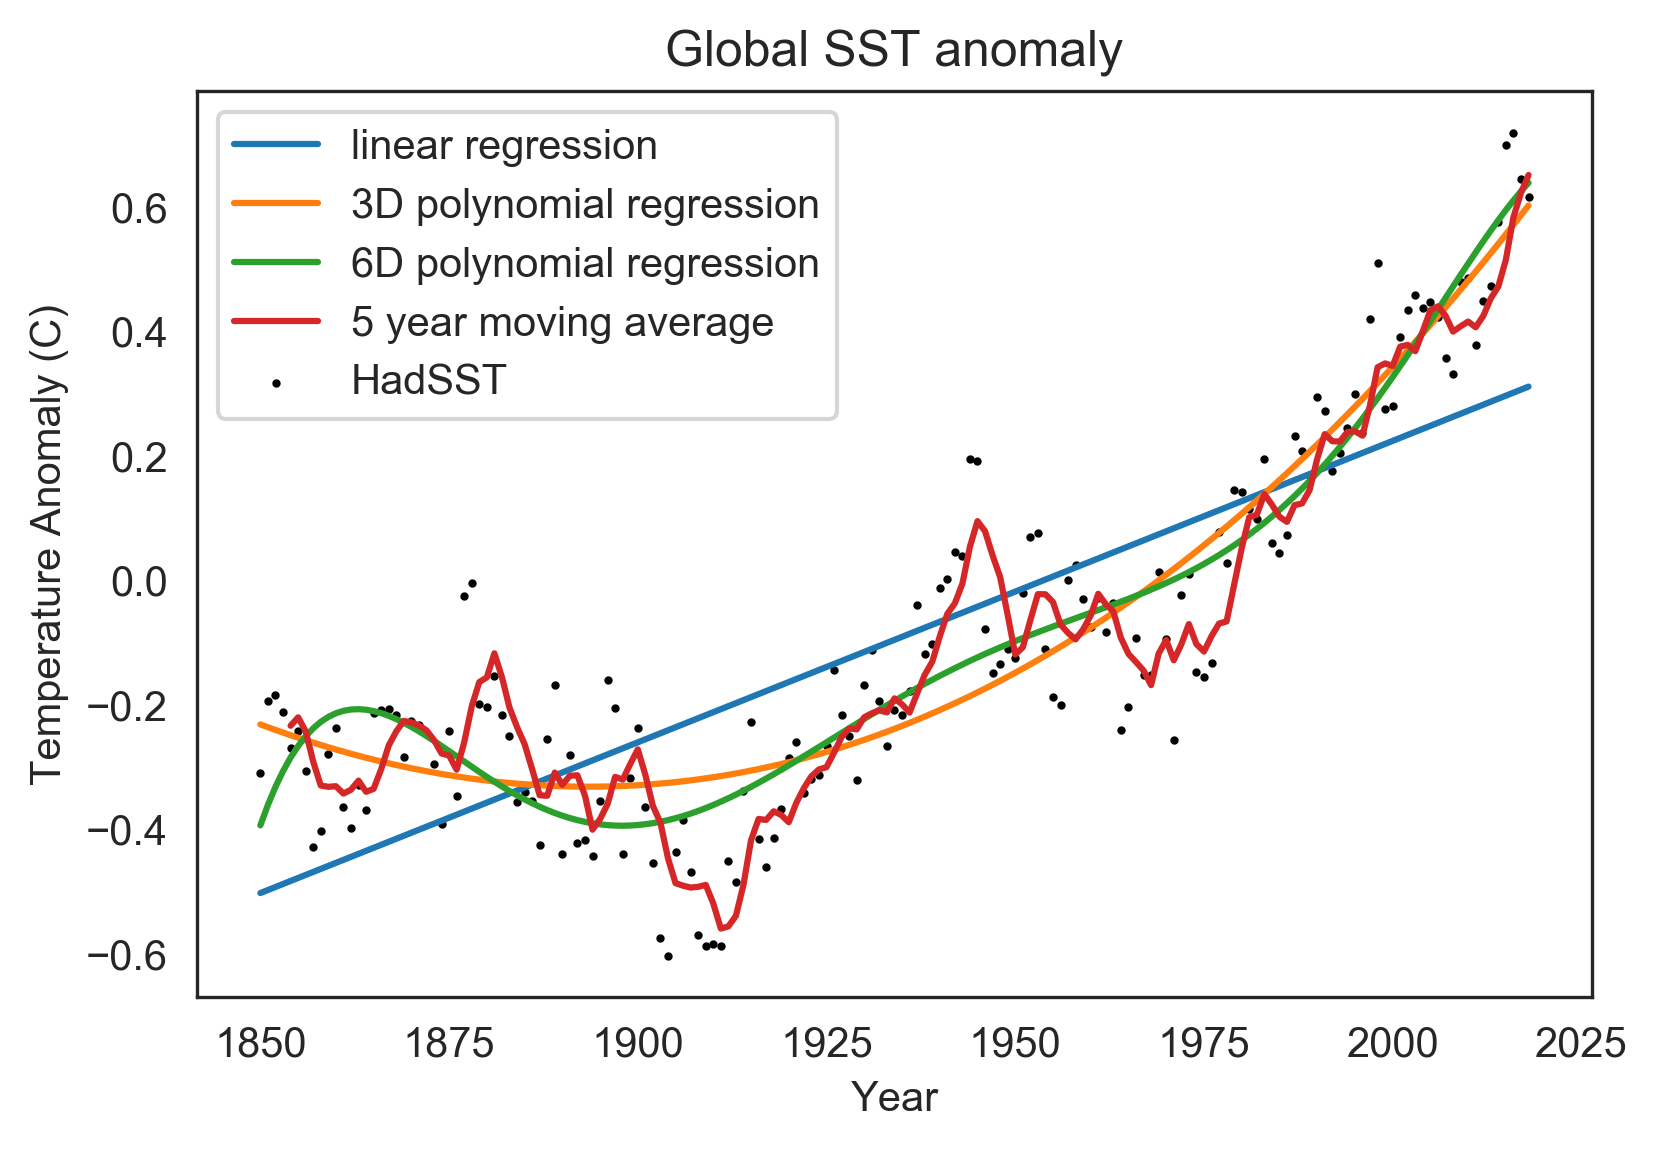

In [52]:
# load in data
hsst = pd.read_csv('/Users/al18709/Desktop/worksheets/HADSST4_timeseries.csv')
hsst_timeseries = hsst['anomaly']
x = range(1850,2019)
y = hsst_timeseries
plt.scatter(x,y,s=1,label='HadSST',color='black')

# perform linear regression to get line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.plot(x,slope*x + intercept,label='linear regression')

# plot a few polynomial fits
plot_poly(x,y,3)
plot_poly(x,y,6)

# plot moving average
years =5
ma = moving_average(y,years)
# remember with moving averages there are no datapoints for the first x-1 years!
plt.plot(x[years-1:],ma,label = '%s year moving average' % years)

# plot results
plt.legend()
plt.title('Global SST anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (C)')
plt.show()

             datetime   temp  humidity  windspeed   atemp
0         1/1/11 0:00   9.84        81     0.0000  14.395
1         1/1/11 1:00   9.02        80     0.0000  13.635
2         1/1/11 2:00   9.02        80     0.0000  13.635
3         1/1/11 3:00   9.84        75     0.0000  14.395
4         1/1/11 4:00   9.84        75     0.0000  14.395
...               ...    ...       ...        ...     ...
10881  12/19/12 19:00  15.58        50    26.0027  19.695
10882  12/19/12 20:00  14.76        57    15.0013  17.425
10883  12/19/12 21:00  13.94        61    15.0013  15.910
10884  12/19/12 22:00  13.94        61     6.0032  17.425
10885  12/19/12 23:00  13.12        66     8.9981  16.665

[10886 rows x 5 columns]
RMSE =  0.6565032198188189


<function matplotlib.pyplot.show(*args, **kw)>

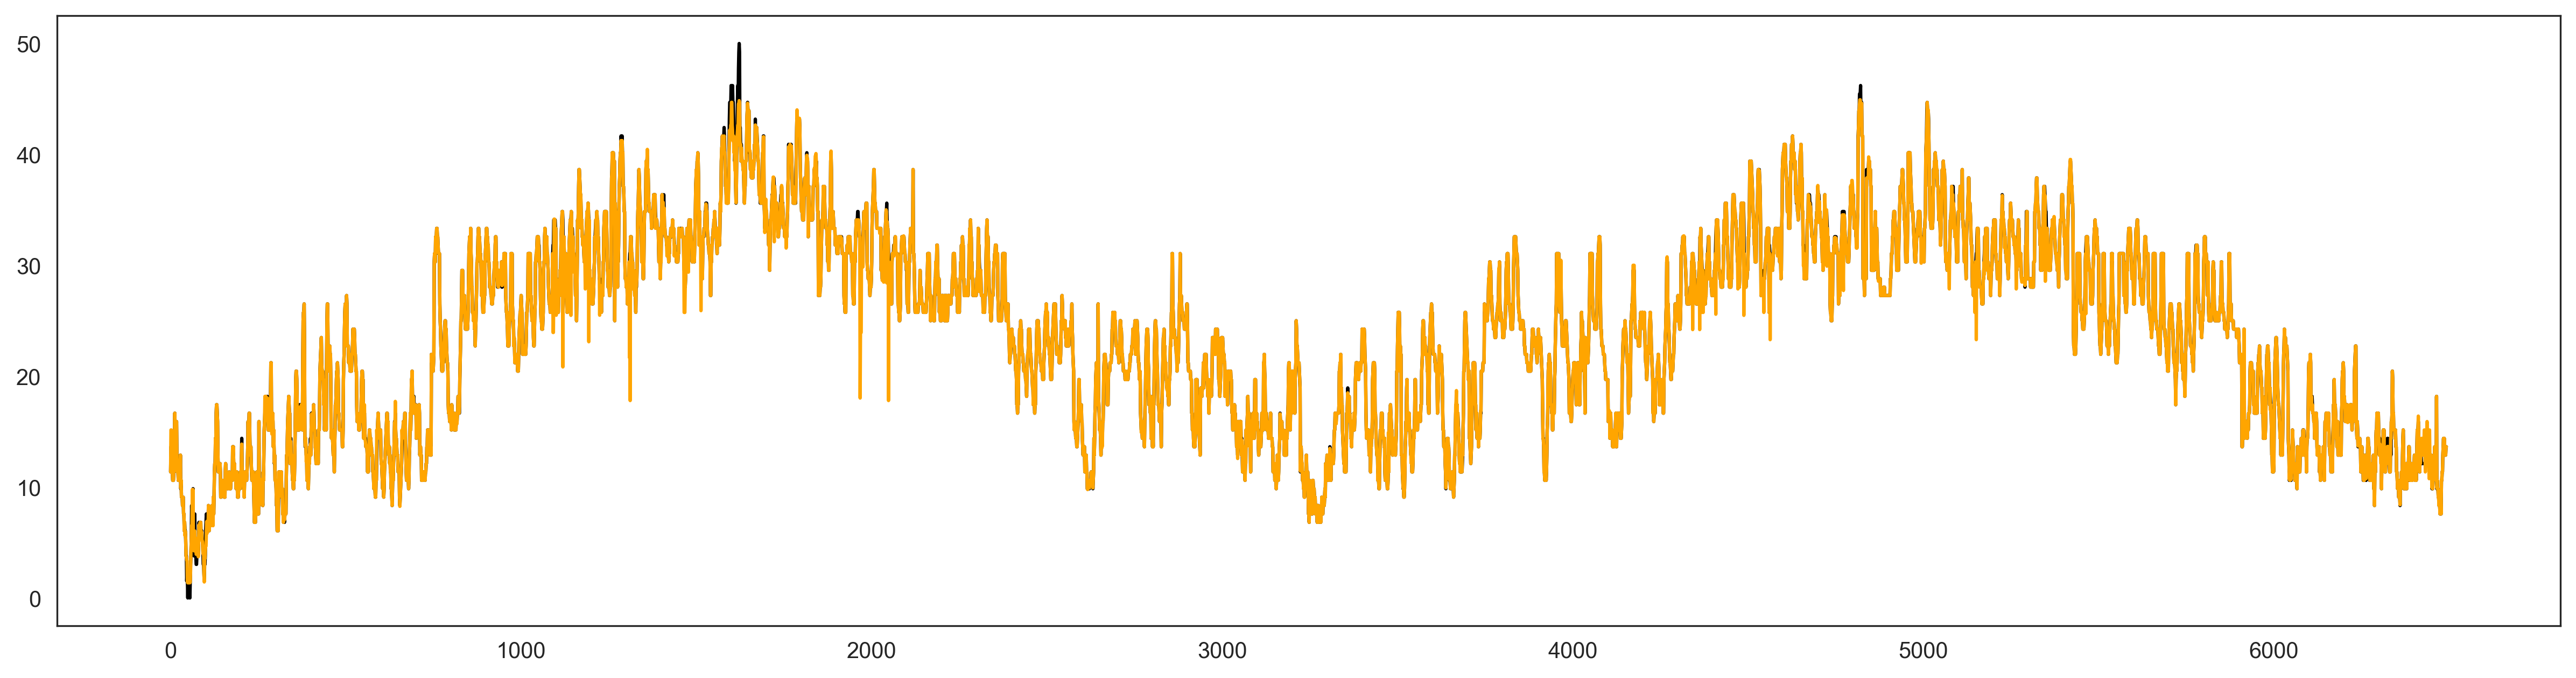

In [87]:
# 2: regression problem

# load train and test datasets
train = pd.read_csv('/Users/al18709/Desktop/ClimateAI/train.csv')
test = pd.read_csv('/Users/al18709/Desktop/ClimateAI/test.csv')
xaxis = test.index
print(train)

train_X,train_y = train[['temp','humidity','windspeed']],train['atemp']
test_X,test_y = test[['temp','humidity','windspeed']],test['atemp']

# create random forest regressor and fit it to the training data
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(train_X,train_y)

# predict the test set values
pred_y = regressor.predict(test_X)
mse = mean_squared_error(pred_y,test_y)
print('RMSE = ',np.sqrt(mse))

plt.figure(figsize=(20,5))
plt.plot(test_y,color='black')
plt.plot(pred_y,color='orange')
plt.show